In [8]:
using JuMP, Gurobi, Plots, Printf

In [9]:
function simple_PowerGeneration(epsilon,mpy_carbon,mpy_oil,mpy_gas,mpy_res,cost_carbon,cost_oil,cost_gas,cost_res,
                                co2_carbon,co2_oil,co2_gas,co2_res,y_demand,base_load,medium_load,peak_load,
                                y1_g,y2_g,y3_g,y4_g,y5_g,y6_g,y7_g,y8_g,y9_g,y10_g,y11_g,y12_g,y13_g,y14_g,y15_g)
    
    power_mo = Model(Gurobi.Optimizer);
    
    @variable(power_mo, carbon_base   >= 0,  start = y1_g  );
    @variable(power_mo, carbon_medium >= 0,  start = y2_g  );
    @variable(power_mo, oil_medium    >= 0,  start = y3_g  );
    @variable(power_mo, oil_peak      >= 0,  start = y4_g  );
    @variable(power_mo, gas_base      >= 0,  start = y5_g  );
    @variable(power_mo, gas_medium    >= 0,  start = y6_g  );
    @variable(power_mo, gas_peak      >= 0,  start = y7_g  );
    @variable(power_mo, res_base      >= 0,  start = y8_g  );
    @variable(power_mo, res_peak      >= 0,  start = y9_g  );
    @variable(power_mo, carbon        >= 0,  start = y10_g );
    @variable(power_mo, oil           >= 0,  start = y11_g );
    @variable(power_mo, gas           >= 0,  start = y12_g );
    @variable(power_mo, res           >= 0,  start = y13_g );
    @variable(power_mo, co2           >= 0,  start = y14_g );
    @variable(power_mo, cost          >= 0,  start = y15_g );
        
    @constraint(power_mo, c1, co2 == co2_carbon*carbon + co2_oil*oil + co2_gas*gas + co2_res*res );
    @constraint(power_mo, c2,  carbon == carbon_base +carbon_medium);
    @constraint(power_mo, c3, oil == oil_medium + oil_peak) ;
    @constraint(power_mo, c4, gas == gas_base + gas_medium + gas_peak); 
    @constraint(power_mo, c5, res == res_base + res_peak) ;
    @constraint(power_mo, c6, carbon_base + gas_base + res_base >= base_load*y_demand) ;
    @constraint(power_mo, c7, carbon_medium + oil_medium + gas_medium >= medium_load*y_demand);
    @constraint(power_mo, c8, oil_peak + gas_peak + res_peak >= peak_load*y_demand) ;
    @constraint(power_mo, c9, carbon <= mpy_carbon);
    @constraint(power_mo, c10, oil <= mpy_oil);
    @constraint(power_mo, c11, gas <= mpy_gas);
    @constraint(power_mo, c12, res <= mpy_res);
    @constraint(power_mo, c13, cost == cost_carbon*carbon + cost_oil*oil + cost_gas*gas + cost_res*res);
    @constraint(power_mo, c15, co2 == epsilon);

    @objective(power_mo, Min, cost);
    
    #@objective(power_mo, Min, co2);
    
    optimize!(power_mo);
    
    y1  = JuMP.value(carbon_base)   ; 
    y2  = JuMP.value(carbon_medium) ; 
    y3  = JuMP.value(oil_medium)    ; 
    y4  = JuMP.value(oil_peak)      ; 
    y5  = JuMP.value(gas_base)      ; 
    y6  = JuMP.value(gas_medium)    ; 
    y7  = JuMP.value(gas_peak)      ; 
    y8  = JuMP.value(res_base)      ; 
    y9  = JuMP.value(res_peak)      ; 
    y10 = JuMP.value(carbon)        ; 
    y11 = JuMP.value(oil)           ; 
    y12 = JuMP.value(gas)           ;
    y13 = JuMP.value(res)           ; 
    y14 = JuMP.value(co2)           ;
    y15 = JuMP.value(cost)          ; 
    
    return y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15 
    
end    

simple_PowerGeneration (generic function with 1 method)

In [10]:
mpy_carbon = 31000 ; # Maximum Production per year (GWh)
mpy_oil    = 15000 ;
mpy_gas    = 22000 ;
mpy_res    = 10000 ;

cost_carbon = 30 ;  # Production cost ($/Mwh)
cost_oil    = 75 ;
cost_gas    = 60 ;
cost_res    = 90 ;

co2_carbon  = 1.44 ; # CO2 emission coefficient (t/MWh)
co2_oil     = 0.72 ;
co2_gas     = 0.45 ;
co2_res     = 0    ;

y_demand    = 64000 ; # Yearly energy demand (GWh)

base_load   = 0.6 ; # Enery load per production period
medium_load = 0.3 ;
peak_load   = 0.1 ;

y1_g  = base_load*mpy_carbon   ;
y2_g  = medium_load*mpy_carbon ;
y3_g  = medium_load*mpy_oil    ;
y4_g  = medium_load*mpy_oil    ;
y5_g  = base_load*mpy_gas      ;
y6_g  = medium_load*mpy_gas    ;
y7_g  = peak_load*mpy_gas      ;
y8_g  = base_load*mpy_res      ;
y9_g  = peak_load*mpy_res      ;
y10_g = 0.5*mpy_carbon         ;
y11_g = 0.5*mpy_oil            ;
y12_g = 0.5*mpy_gas            ;
y13_g = 0.5*mpy_res            ;
y14_g = 50000                  ;
y15_g = 1e06                   ;


In [11]:
np    = 21
cost  = ones(np)
co2   = ones(np)

i = 0
for eps in [45180 46000 47000 48000 49000 50000 51000 52000 53000 54000 55000 56000 57000 58000 59000 60000 60500]
    
    i = i+1     
    y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15 = simple_PowerGeneration(eps,mpy_carbon,mpy_oil,mpy_gas,mpy_res,cost_carbon,
                                                     cost_oil,cost_gas,cost_res,co2_carbon,co2_oil,co2_gas,co2_res,y_demand,
                                                     base_load,medium_load,peak_load,y1_g,y2_g,y3_g,y4_g,y5_g,y6_g,y7_g,y8_g,
                                                     y9_g,y10_g,y11_g,y12_g,y13_g,y14_g,y15_g)
        
    cost[i] = y15
    co2[i]  = y14
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 14 rows, 15 columns and 36 nonzeros
Model fingerprint: 0x4d3a1db8
Coefficient statistics:
  Matrix range     [5e-01, 9e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+03, 5e+04]
Presolve removed 7 rows and 3 columns
Presolve time: 0.00s
Presolved: 7 rows, 12 columns, 23 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0948997e+05   8.467685e+03   0.000000e+00      0s
       6    3.8550000e+06   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.00 seconds
Optimal objective  3.855000000e+06
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 14 rows, 15 columns and 36 nonzeros
Model fingerprint: 0xdd5d

In [12]:
for eps in [61000 61500 62000 62460]
   
    i = i+1     
    y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15 = simple_PowerGeneration(eps,mpy_carbon,mpy_oil,mpy_gas,mpy_res,cost_carbon,
                                                     cost_oil,cost_gas,cost_res,co2_carbon,co2_oil,co2_gas,co2_res,y_demand,
                                                     base_load,medium_load,peak_load,y1_g,y2_g,y3_g,y4_g,y5_g,y6_g,y7_g,y8_g,
                                                     y9_g,y10_g,y11_g,y12_g,y13_g,y14_g,y15_g)
        
    cost[i] = y15
    co2[i]  = y14
end

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 14 rows, 15 columns and 36 nonzeros
Model fingerprint: 0x3dc1c966
Coefficient statistics:
  Matrix range     [5e-01, 9e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e+03, 6e+04]
Presolve removed 7 rows and 3 columns
Presolve time: 0.00s
Presolved: 7 rows, 12 columns, 23 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.2515793e+06   3.408800e+03   0.000000e+00      0s
       9    3.1054167e+06   0.000000e+00   0.000000e+00      0s

Solved in 9 iterations and 0.00 seconds
Optimal objective  3.105416667e+06
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (mac64)
Optimize a model with 14 rows, 15 columns and 36 nonzeros
Model fingerprint: 0x95a5

In [13]:
np1 = 1:np
println("----------------------------------------------------------")
println("Point CO2 Emissions         Cost                         ")
println("----------------------------------------------------------")

for i in np1
     @printf "  %2i     %8.2f        %10.2f\n" i  co2[i]  cost[i]
end
println("----------------------------------------------------------")



----------------------------------------------------------
Point CO2 Emissions         Cost                         
----------------------------------------------------------
   1     45180.00        3855000.00
   2     46000.00        3803750.00
   3     47000.00        3741250.00
   4     48000.00        3678750.00
   5     49000.00        3616250.00
   6     50000.00        3553750.00
   7     51000.00        3491250.00
   8     52000.00        3428750.00
   9     53000.00        3366250.00
  10     54000.00        3303750.00
  11     55000.00        3241250.00
  12     56000.00        3209583.33
  13     57000.00        3188750.00
  14     58000.00        3167916.67
  15     59000.00        3147083.33
  16     60000.00        3126250.00
  17     60500.00        3115833.33
  18     61000.00        3105416.67
  19     61500.00        3095000.00
  20     62000.00        3084583.33
  21     62460.00        3075000.00
----------------------------------------------------------


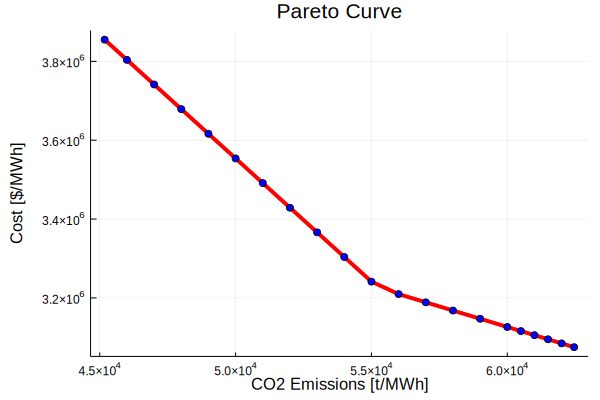

In [14]:
plot(co2,cost,color=:red, label="",lw=4)
scatter!(co2,cost,color=:blue, label="")
xlabel!("CO2 Emissions [t/MWh]")
ylabel!("Cost [\$/MWh]")
title!("Pareto Curve")